In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [4]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [5]:
data.shape

(7920, 3)

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [8]:
import re
import string

In [9]:
data["tweet"] =data["tweet"].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [10]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [11]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))


In [12]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [15]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [16]:
data["tweet"].head(15)

0     fingerprint pregnancy test  android apps beaut...
1     finally a transparant silicon case  thanks to ...
2     we love this would you go talk makememories un...
3     im wired i know im george i was made that way ...
4     what amazing service apple wont even talk to m...
5     iphone software update fucked up my phone big ...
6     happy for us  instapic instadaily us sony xper...
7     new type c charger cable uk  … bay amazon etsy...
8     bout to go shopping again listening to music i...
9     photo fun selfie pool water sony camera picoft...
10    hey apple when you make a new ipod dont make i...
11    ha not heavy machinery but it does what i need...
12    contemplating giving in to the iphone bandwago...
13    i just made another crazy purchase lol my theo...
14    shaqlockholmes samlouise1991 the battery is so...
Name: tweet, dtype: object

In [17]:
data["tweet"].tail(10)


7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [18]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)


In [19]:
data["tweet"].tail(10)


7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stopwords

In [20]:
!pip install nltk


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import nltk

In [22]:
nltk.download('stopwords', download_dir='../static/model')


[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [23]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [24]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))


In [26]:
data["tweet"].head()


0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [27]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [28]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))


In [29]:
data["tweet"].head()


0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [30]:
## Building Vacabulary


In [31]:
from collections import Counter
vocab = Counter()

In [32]:
vocab

Counter()

In [33]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [34]:
len(vocab)


15949

In [35]:
data.shape


(7920, 3)

In [36]:
tokens = [key for key in vocab if vocab[key] > 10]


In [38]:
len(tokens)

1145

In [39]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

In [40]:
## Devide dataSet

In [49]:
X = data['tweet']
Y = data['label']

In [52]:
X

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [53]:
Y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [54]:
!pip install scikit-learn

In [55]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
X_train

3882    danc gavin danc last day summer class music ip...
4656                         im iphon lol tote emot right
7741    know get new phoneim go make video break motor...
1586    one man look love facebook — use ad facebook a...
4802    istanbul hagiasophia byzantin histori easter e...
                              ...                        
7856    play new phone samsung galaxi sweet im go slee...
3620    samsung galaxi note thank sooo much dad tablet...
5293    got new cover iphon samsung shop mahztravel ph...
7740    new phone iphon iphon best favorit photoofthed...
301               oneplu final fix fast effici thx oneplu
Name: tweet, Length: 6336, dtype: object

In [58]:
X_test

374     iphon itun piss might well restor whole phone ...
2091    switch iphon android im love dont regret samsu...
6653    askmeanyth drandrew answer live ask question d...
2372    christianpickuplin iphon ipad io natur … … goc...
5583    like share want xiaomi redmi pro prime iphon s...
                              ...                        
7580    debat sinc can’t updat ipad io jailbreak io ip...
3365    photo america usa tablet samsung tab photoofth...
7695    iphon give freebi upgrad phone cnt bk samsung ...
7658    hate appl passion alway comput mess gonna mac ...
5159    i’v got danc shoe tonight drummer instagram ip...
Name: tweet, Length: 1584, dtype: object

In [59]:
## vectorization

In [60]:
 def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [61]:
vectorized_x_train = vectorizer(X_train, tokens)


In [62]:
vectorized_x_test = vectorizer(X_test, tokens)


In [63]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [64]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [65]:
y_train

3882    0
4656    0
7741    1
1586    0
4802    0
       ..
7856    0
3620    0
5293    0
7740    0
301     0
Name: label, Length: 6336, dtype: int64

In [67]:
y_test


374     1
2091    1
6653    0
2372    0
5583    0
       ..
7580    1
3365    0
7695    0
7658    1
5159    0
Name: label, Length: 1584, dtype: int64

In [68]:
y_train.value_counts()


label
0    4731
1    1605
Name: count, dtype: int64

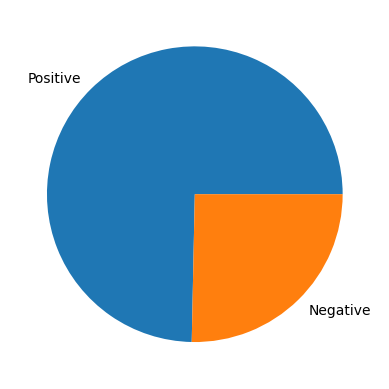

In [69]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [70]:
### Handle imbalanced dataset (data ahari samanawa balance karanawa)

In [71]:
!pip install imbalanced-learn


   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ----- ---------------------------------- 30.7/235.6 kB 1.3 MB/s eta 0:00:01
   --------------- ------------------------ 92.2/235.6 kB 1.1 MB/s eta 0:00:01
   -------------------------- ------------- 153.6/235.6 kB 1.1 MB/s eta 0:00:01
   ---------------------------------- ----- 204.8/235.6 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 235.6/235.6 kB 1.1 MB/s eta 0:00:00


In [72]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9462, 1145) (9462,)


In [73]:
y_train_smote.value_counts()


label
0    4731
1    4731
Name: count, dtype: int64

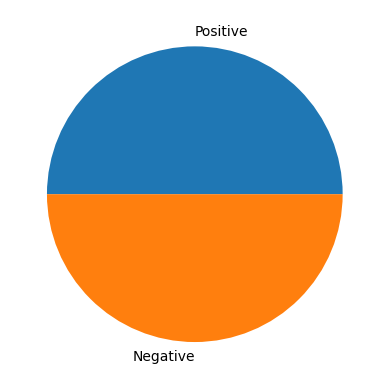

In [74]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [75]:
vectorized_x_train_smote


array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.1577712, 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [76]:
y_train_smote


0       0
1       0
2       1
3       0
4       0
       ..
9457    1
9458    1
9459    1
9460    1
9461    1
Name: label, Length: 9462, dtype: int64

In [77]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [78]:
y_test

374     1
2091    1
6653    0
2372    0
5583    0
       ..
7580    1
3365    0
7695    0
7658    1
5159    0
Name: label, Length: 1584, dtype: int64

In [79]:
# # Model Training and Evaluation

In [80]:
 from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [81]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

In [83]:
## Logistic Regression

In [84]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.94
	Precision = 0.919
	Recall = 0.964
	F1-Score = 0.941
Testing Scores:
	Accuracy = 0.885
	Precision = 0.753
	Recall = 0.846
	F1-Score = 0.796


In [85]:
## Naive Based

In [86]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.907
	Precision = 0.87
	Recall = 0.958
	F1-Score = 0.912
Testing Scores:
	Accuracy = 0.871
	Precision = 0.692
	Recall = 0.924
	F1-Score = 0.791


In [87]:
## DecisionTreeClassifier

In [88]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.821
	Precision = 0.678
	Recall = 0.62
	F1-Score = 0.648


In [89]:
##RandomForestClassifier

In [90]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.855
	Precision = 0.754
	Recall = 0.677
	F1-Score = 0.713


In [91]:
## Support Vector Machine


In [93]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.98
	Precision = 0.966
	Recall = 0.996
	F1-Score = 0.981
Testing Scores:
	Accuracy = 0.883
	Precision = 0.773
	Recall = 0.791
	F1-Score = 0.782


In [94]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)